## Whole File Reader

In [2]:
import tensorflow as tf
import glob
%matplotlib inline
import matplotlib.pyplot as plt

### Utilities

In [3]:
def run_tf(x):
    
    config = tf.ConfigProto()
    config.gpu_options.allow_growth=True
    with tf.Session(config=config) as sess:    
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)

        out = sess.run(x)

        coord.request_stop()
        coord.join(threads)
        
        return out

### Steps

>1) Create a queue of file names

>2) Create **tf.WholeFileReader**

>3) read the queue

In [4]:
cat_dog_train_path = '/home/sankaran/exercise/ML/TF-Exercise/Low_Level_APIs/Cats&Dogs/train/*.jpg'
filenames = glob.glob(cat_dog_train_path)

# Create a queue that produces the filenames to read.
filename_queue = tf.train.string_input_producer(filenames)

reader = tf.WholeFileReader()
key,value = reader.read(filename_queue)

image = tf.image.decode_jpeg(value)
image = tf.image.resize_images(image,(224,224),method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
image = tf.reshape(image,[224,224,3])

image.shape

TensorShape([Dimension(224), Dimension(224), Dimension(3)])

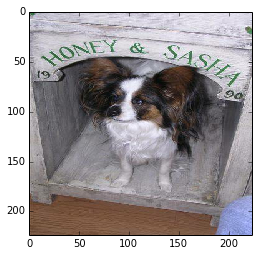

In [5]:
plt.imshow(run_tf(image))

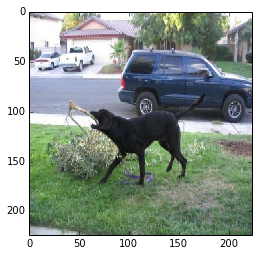

In [6]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

sess = tf.InteractiveSession(config=config)

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

im = sess.run(image)
plt.imshow(im)

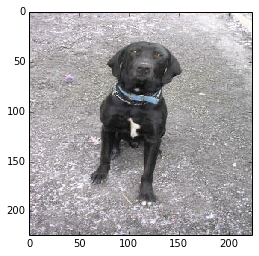

In [7]:
im = sess.run(image)
plt.imshow(im)

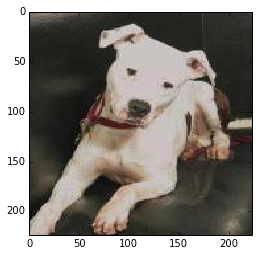

In [9]:
im = sess.run(image)
plt.imshow(im)

In [20]:
coord.request_stop()
coord.join(threads)
sess.close()